In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TUGAS AKHIR/DATASET/4000_data.csv")
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785092859995328943,Mon Apr 29 23:44:37 +0000 2024,2,Setuju soal pengamanan ekonomi RI tapi ya liat...,1785092859995328943,NaN,NaN,in,indonesia ~ turkey,0,0,0,https://x.com/_bje/status/1785092859995328943,123150908,_bje
1,1784870806113120564,Mon Apr 29 23:35:30 +0000 2024,0,@tvOneNews Kalo Saldi Isra mengatakan hal krn ...,1785090562657575202,NaN,tvOneNews,in,Hongkong China,0,0,0,https://x.com/johnguntoro/status/1785090562657...,68744564,johnguntoro
2,1784882373823508522,Mon Apr 29 23:32:20 +0000 2024,0,@ainunnajib @beacukaiRI @prastow Beres masalah...,1785089766821921244,NaN,ainunnajib,in,"Bandung, Jawa Barat",0,0,0,https://x.com/penyintaswaktu/status/1785089766...,453512256,penyintaswaktu
3,1785086538982031379,Mon Apr 29 23:24:28 +0000 2024,1,@did1k Rasanya sih sulit ya membuka mata merek...,1785087787844448595,NaN,did1k,in,Jakarta,0,1,0,https://x.com/mattivityroom/status/17850877878...,742185389302026242,mattivityroom
4,1785085303814008895,Mon Apr 29 23:14:36 +0000 2024,0,Sudahkah anda merujak Jerome Polin dan/atau Be...,1785085303814008895,NaN,NaN,in,deep space nine,0,0,0,https://x.com/parkerplak/status/17850853038140...,1758399739245326336,parkerplak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,1786196713935716516,Fri May 03 09:25:04 +0000 2024,0,@5teV3n_Pe9eL Mati lg dirjen beacukai.... up t...,1786326096407117856,NaN,5teV3n_Pe9eL,in,NaN,0,0,0,https://twitter.com/bosssbesa/status/178632609...,1764952914798563328,bosssbesa
4381,1786000306872148019,Fri May 03 09:23:01 +0000 2024,0,@kegblgnunfaedh Menurut saya perlu dikoreksi p...,1786325582327976288,NaN,kegblgnunfaedh,in,NaN,0,0,0,https://twitter.com/bos_w4n/status/17863255823...,1543954040924409856,bos_w4n
4382,1786325509879771304,Fri May 03 09:22:44 +0000 2024,0,Mana si bea cukai mau hiring buzzer wkwk manta...,1786325509879771304,NaN,NaN,in,Indonesia,0,0,0,https://twitter.com/haroable/status/1786325509...,852882656266027010,haroable
4383,1786321691301577202,Fri May 03 09:22:23 +0000 2024,0,@xxnorm @beacukaiRI Uda tau beacukai gak bakal...,1786325421216440780,NaN,xxnorm,in,NaN,0,1,0,https://twitter.com/satio0/status/178632542121...,968356340379811841,satio0


#TEXT PRE-PROCESSING
1.CLEANING

In [ ]:
data = data[['full_text']]
data

,full_text
0,tuju soal aman ekonomi ri ya liat skala masif ...
1,kalo saldi isra kata krn banyak adil yg handel...
2,beres masalah tp tetap picu cibir publik gila ...
3,rasa sih sulit buka mata kalo beberapa barang ...
4,anda rujak jerome polin danatau beacukai
...,...
4372,pantess bea cukai peg nya kaya jahanam kalian ...
4373,mati lg dirjen beacukai up terus netizen 62
4374,turut perlu koreksi atur bea cukai pergi kelua...
4375,mana si bea cukai mau hiring buzzer wkwk manta...


In [ ]:
data.shape

(4385, 1)

In [ ]:
data = data.drop_duplicates(subset=['full_text'])

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
full_text,0


In [ ]:
data.shape

(4377, 1)

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

data['full_text'] = data['full_text'].apply(clean_twitter_text)

In [ ]:
data['full_text'] = data['full_text'].str.lower()

In [ ]:
data

,full_text
0,setuju soal pengamanan ekonomi ri tapi ya liat...
1,kalo saldi isra mengatakan hal krn ada banyak ...
2,beres masalah tp tetap memicu cibiran publik g...
3,rasanya sih sulit ya membuka mata mereka kalo ...
4,sudahkah anda merujak jerome polin danatau bea...
...,...
4379,pantess bea cukai peg nya kaya jahanam kalian ...
4380,mati lg dirjen beacukai up terus netizen 62
4381,menurut saya perlu dikoreksi peraturan di bea ...
4382,mana si bea cukai mau hiring buzzer wkwk manta...


2.TOKENIZING

In [ ]:
tokenized = data['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[setuju, soal, pengamanan, ekonomi, ri, tapi, ..."
1,"[kalo, saldi, isra, mengatakan, hal, krn, ada,..."
2,"[beres, masalah, tp, tetap, memicu, cibiran, p..."
3,"[rasanya, sih, sulit, ya, membuka, mata, merek..."
4,"[sudahkah, anda, merujak, jerome, polin, danat..."
...,...
4379,"[pantess, bea, cukai, peg, nya, kaya, jahanam,..."
4380,"[mati, lg, dirjen, beacukai, up, terus, netize..."
4381,"[menurut, saya, perlu, dikoreksi, peraturan, d..."
4382,"[mana, si, bea, cukai, mau, hiring, buzzer, wk..."


3.NORMALISASI

In [ ]:
norm = { " yg ": " yang", "uda": "sudah", "lg": "lagi", "gak": "tidak",
        "lg": "lagi", "jd": "jadi", "brp": "berapa", "tntng": "tentang", "bsa": "bisa"}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['full_text'] = data['full_text'].apply(lambda x: normalisasi(x))
data

,full_text
0,setuju soal pengamanan ekonomi ri tapi ya liat...
1,kalo saldi isra mengatakan hal krn ada banyak ...
2,beres masalah tp tetap memicu cibiran publik g...
3,rasanya sih sulit ya membuka mata mereka kalo ...
4,ssudahhkah anda merujak jerome polin danatau b...
...,...
4379,pantess bea cukai peg nya kaya jahanam kalian ...
4380,mati lagi dirjen beacukai up terus netizen 62
4381,menurut saya perlu dikoreksi peraturan di bea ...
4382,mana si bea cukai mau hiring buzzer wkwk manta...


4.STEMMER

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = ()
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean


tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/TUGAS AKHIR/DATASET/Prepocessing.csv", index=False)
data = pd.read_csv("/content/drive/MyDrive/TUGAS AKHIR/DATASET/Prepocessing.csv", encoding='latin')

tuju soal aman ekonomi ri tapi ya liat skala masif tidak di beacukai yg recok itu kan rakyat biasa yg uang tak berapa itu coba beraniin terus sasar kemplang pajak internal jabat pajak sendiri para koruptor yg jelas rugi negara triliun
kalo saldi isra kata hal krn ada banyak adil yg handel masalah tsb lalu departemen mana yg wakil bc juru bicara bc gaji oleh rakyat tapi kerja macam tukang jaga toilet spbu
beres masalah tp tetap picu cibir publik gila sih ini institusi inkompeten mana kesan jd beacukai yg nyumbang itu foto gatau malu
rasa sih sulit ya buka mata mereka kalo ada beberapa barang itu ga kita beli tapi hadiah atau bahkan di kasih barang2 merch hacktoberfest gamejam ctf hadiah kantor kalo kerja remote banyak yang tahan di beacukai karena masalah fiskal yang asal tembak
sudah anda rujak jerome polin danatau beacukai
harus utk beacukai
udah sih tuh beacukai dan tugas pajak
orang beacukai emang kena spech delay
oleh oleh dari sana moga ngak begal di beacukai
sekarang nyangkutnya 

5.STOPWORDS

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory
import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["yang", "di", "dan", "dari", "ke", "untuk",
                   "adalah", "ini", "itu", "sebuah", "pada",
                   "dengan", "dalam", "atau", "tidak", "saya", "kami"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data['full_text'] = data['full_text'].apply(lambda x: stopword(x))
data.head()

,full_text
0,tuju soal aman ekonomi ri ya liat skala masif ...
1,kalo saldi isra kata krn banyak adil yg handel...
2,beres masalah tp tetap picu cibir publik gila ...
3,rasa sih sulit buka mata kalo beberapa barang ...
4,anda rujak jerome polin danatau beacukai


In [ ]:
data.to_csv("/content/drive/MyDrive/TUGAS AKHIR/DATASET/PrepocessingFIX.csv")

#LABELING

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TUGAS AKHIR/DATASET/datapreposessing(1).csv", encoding='latin')
data

,Unnamed: 0,full_text
0,0,tuju soal aman ekonomi ri ya liat skala masif ...
1,1,kalo saldi isra kata krn banyak adil yanghande...
2,2,beres masalah tp tetap picu cibir publik gila ...
3,3,rasa sih sulit buka mata kalo beberapa barang ...
4,4,ssudahhkah rujak jerome polin danatau beacukai
...,...,...
4372,4372,pantess bea cukai peg nya kaya jahanam kalian ...
4373,4373,mati dirjen beacukai up terus netizen 62
4374,4374,saya perlu koreksi atur bea cukai pergi keluar...
4375,4375,mana si bea cukai mau hiring buzzer wkwk manta...


In [ ]:
data = data[['full_text']]
data

,full_text
0,tuju soal aman ekonomi ri ya liat skala masif ...
1,kalo saldi isra kata krn banyak adil yanghande...
2,beres masalah tp tetap picu cibir publik gila ...
3,rasa sih sulit buka mata kalo beberapa barang ...
4,ssudahhkah rujak jerome polin danatau beacukai
...,...
4372,pantess bea cukai peg nya kaya jahanam kalian ...
4373,mati dirjen beacukai up terus netizen 62
4374,saya perlu koreksi atur bea cukai pergi keluar...
4375,mana si bea cukai mau hiring buzzer wkwk manta...


In [ ]:
## baca kamus lexicon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
  positive_count = sum(1 for word in text.split() if word in positive_lexicon)
  negative_count = sum(1 for word in text.split() if word in negative_lexicon)
  if positive_count > negative_count:
    return "Positive"
  elif positive_count < negative_count:
    return "Negative"
  else:
    return None

# Tentukan sentimen untuk setiap ulasan
data['Sentiment'] = data['full_text'].apply(determine_sentiment)
data

,full_text,Sentiment
0,tuju soal aman ekonomi ri ya liat skala masif ...,Negative
1,kalo saldi isra kata krn banyak adil yanghande...,Negative
2,beres masalah tp tetap picu cibir publik gila ...,Negative
3,rasa sih sulit buka mata kalo beberapa barang ...,Negative
4,ssudahhkah rujak jerome polin danatau beacukai,None
...,...,...
4372,pantess bea cukai peg nya kaya jahanam kalian ...,Negative
4373,mati dirjen beacukai up terus netizen 62,None
4374,saya perlu koreksi atur bea cukai pergi keluar...,Negative
4375,mana si bea cukai mau hiring buzzer wkwk manta...,Negative


In [ ]:
#menghapus kolom yang kosong
data = data.dropna()
data.isnull().sum()

,0
full_text,0
Sentiment,0


In [ ]:
data

,full_text,Sentiment
0,tuju soal aman ekonomi ri ya liat skala masif ...,Negative
1,kalo saldi isra kata krn banyak adil yanghande...,Negative
2,beres masalah tp tetap picu cibir publik gila ...,Negative
3,rasa sih sulit buka mata kalo beberapa barang ...,Negative
5,harus utk beacukai,Negative
...,...,...
4370,presiden tetap target terima pajak lama tahun ...,Negative
4371,open unlock imei beacukai amp kemenprin perman...,Positive
4372,pantess bea cukai peg nya kaya jahanam kalian ...,Negative
4374,saya perlu koreksi atur bea cukai pergi keluar...,Negative


#KLASIFIKASI

In [ ]:
data = data.replace({'Positive':1, 'Negative':0})

In [ ]:
data

,full_text,Sentiment
0,tuju soal aman ekonomi ri ya liat skala masif ...,0
1,kalo saldi isra kata krn banyak adil yanghande...,0
2,beres masalah tp tetap picu cibir publik gila ...,0
3,rasa sih sulit buka mata kalo beberapa barang ...,0
5,harus utk beacukai,0
...,...,...
4370,presiden tetap target terima pajak lama tahun ...,0
4371,open unlock imei beacukai amp kemenprin perman...,1
4372,pantess bea cukai peg nya kaya jahanam kalian ...,0
4374,saya perlu koreksi atur bea cukai pergi keluar...,0


In [ ]:
data_negative = data[data['Sentiment'] == 0]
data_positive= data[data['Sentiment'] == 1]

In [ ]:
data['Sentiment'].value_counts()

,count
Sentiment,
0,2089
1,1167


In [ ]:
# Memisahkan data menjadi data latih dan data uji
X = data['full_text']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_voc = vectorizer.fit_transform(X_train)
X_test_voc = vectorizer.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_voc, y_train)

In [ ]:
# modeling
niave_bayes = MultinomialNB()
niave_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = niave_bayes.predict(X_test_voc)

In [ ]:
# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
conf_mat = confusion_matrix(y_test, y_pred)

print("Akurasi Model Naive Bayes : ", accuracy)
print("\n Laporan klasifikasi :\n ", classification_rep)
print("\nConfusion Matrix : \n", conf_mat)

Akurasi Model Naive Bayes :  0.803680981595092

 Laporan klasifikasi :
                precision    recall  f1-score   support

    Negative       0.79      0.93      0.85       301
    Positive       0.84      0.60      0.70       188

    accuracy                           0.80       489
   macro avg       0.82      0.77      0.78       489
weighted avg       0.81      0.80      0.80       489


Confusion Matrix : 
 [[280  21]
 [ 75 113]]


In [ ]:
new_text = input("\nMasukan teks baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = niave_bayes.predict(new_text_vec)

if predicted_sentimen[0] ==1:
  sentiment_label = "Positive"
elif predicted_sentimen[0] == 0:
  sentiment_label = "Negative"

print("Hasil Analisis Sentimen untuk teks baru :", sentiment_label)


Masukan teks baru : tidak bagus
Hasil Analisis Sentimen untuk teks baru : Negative


#VISUALISASI

<ipython-input-18-8d91b8d8ff85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


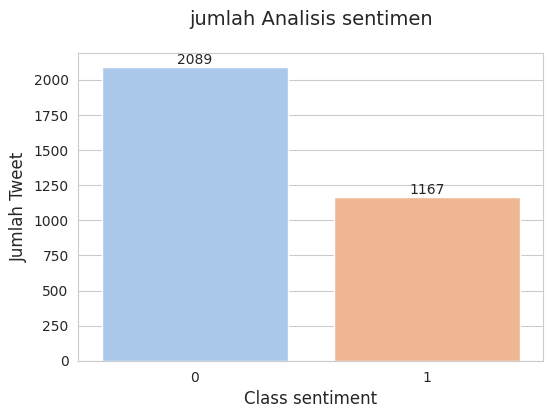

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('jumlah Analisis sentimen', fontsize=14, pad=20)
plt.xlabel('Class sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

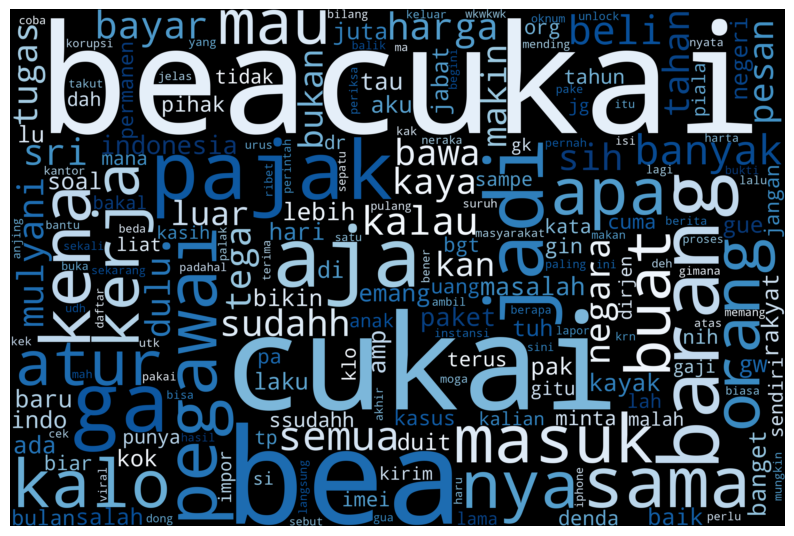

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

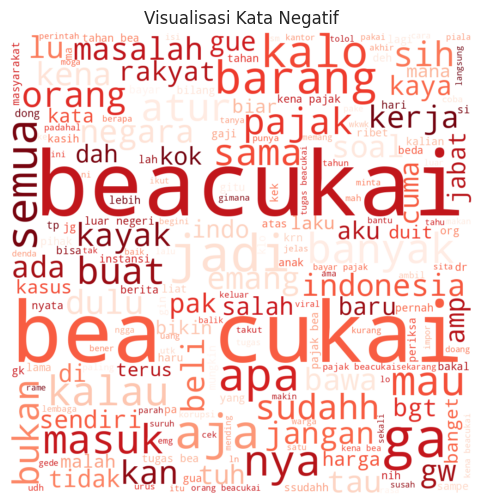

In [ ]:
all_text_s0 = ' '.join(word for word in data_negative["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

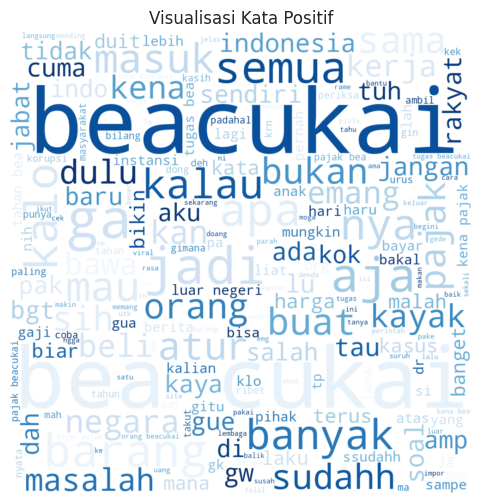

In [ ]:
all_text_s1 = ' '.join(word for word in data_positive["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

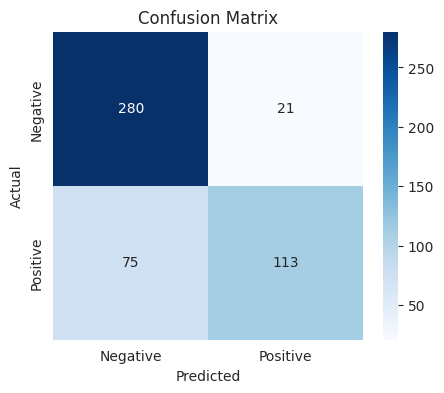

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()